analyze medical data. We will use various data analysis techniques, such as searching for missing values and outliers, and plot visualizations to observe trends and patterns that exist in the data. We will create bar charts, heatmaps, and other visualizations using seaborn and Matplotlib to understand how the features we'll be looking at affect the target column of the dataset.

**We will be checking for outliers, missing values, and the trends and relationships between different features of the dataset to gain a better understanding of the available data and derive useful insights from it.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/0023ND744/Desktop/my_notebooks/for_upload/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
# renaming the columns for better understanding
df.rename(index = str, columns = {
    'cp' : 'chest_pain',
    'trestbps' : 'rest_bp', 
    'fbs' : 'fast_bld_sugar', 
    'restecg' : 'rest_ecg', 
    'thalach' : 'max_hr', 
    'exang' : 'ex_angina', 
    'oldpeak' : 'st_depr', 
    'ca' : 'colored_vessels',
    'thal' : 'thalassemia', 
}, inplace = True)


In [8]:
df

,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg,max_hr,ex_angina,st_depr,slope,colored_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   sex              303 non-null    int64  
 2   chest_pain       303 non-null    int64  
 3   rest_bp          303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fast_bld_sugar   303 non-null    int64  
 6   rest_ecg         303 non-null    int64  
 7   max_hr           303 non-null    int64  
 8   ex_angina        303 non-null    int64  
 9   st_depr          303 non-null    float64
 10  slope            303 non-null    int64  
 11  colored_vessels  303 non-null    int64  
 12  thalassemia      303 non-null    int64  
 13  target           303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5+ KB


### check to see if our dataset has any outliers

Box plots are a type of visualization that is great for visualizing outliers. They provide us with a lot of information about our data, such as the median, the first quartile, the third quartile, and the minimum and maximum values, as well as the existence of outliers,

In [11]:
# notice the chol column its median values are around 246 but it has one value which is 564, so its an outlier.
# chol	303.0	246.264026	51.830751	126.0	211.0	240.0	274.5	564.0

In [12]:
# so how to detect it ?


C:\Users\0023ND744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


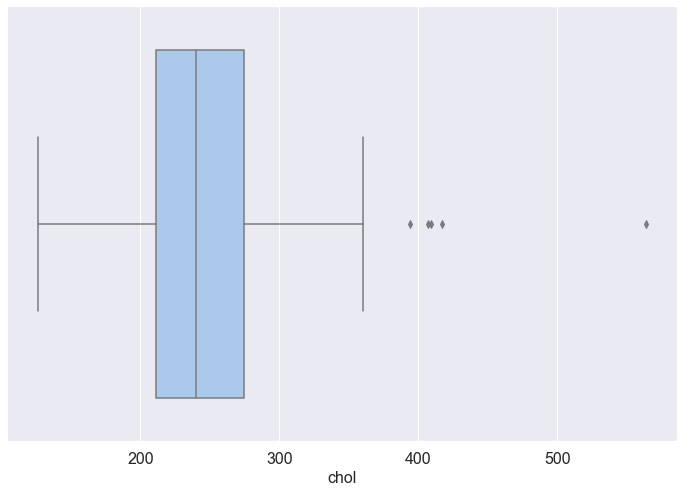

In [13]:
sns.set(palette = 'pastel', rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 16, "ytick.labelsize" : 16 })

chol = sns.boxplot(df['chol'])
plt.show()

In [14]:
# outliers in the st_depr, colored_vessels, and thalassemia columns.

C:\Users\0023ND744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


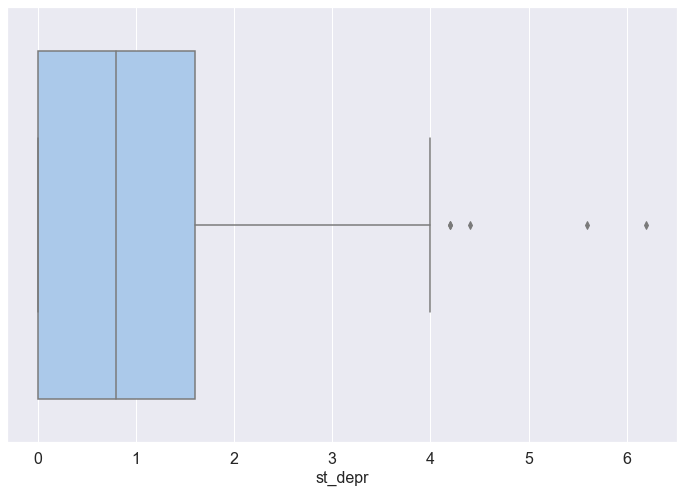

In [15]:
sns.set(palette = 'pastel', rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 16, "ytick.labelsize" : 16 })

depr = sns.boxplot(df['st_depr'])
plt.show()

C:\Users\0023ND744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


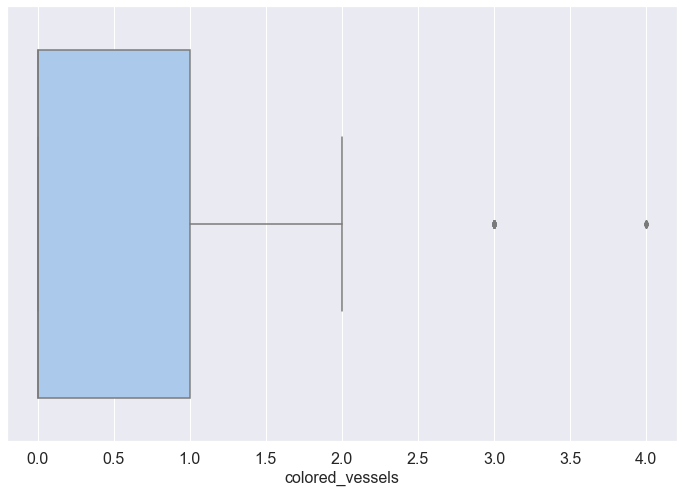

In [16]:
sns.set(palette = 'pastel', rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 16, "ytick.labelsize" : 16 })

vessels = sns.boxplot(df['colored_vessels'])
plt.show()

C:\Users\0023ND744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


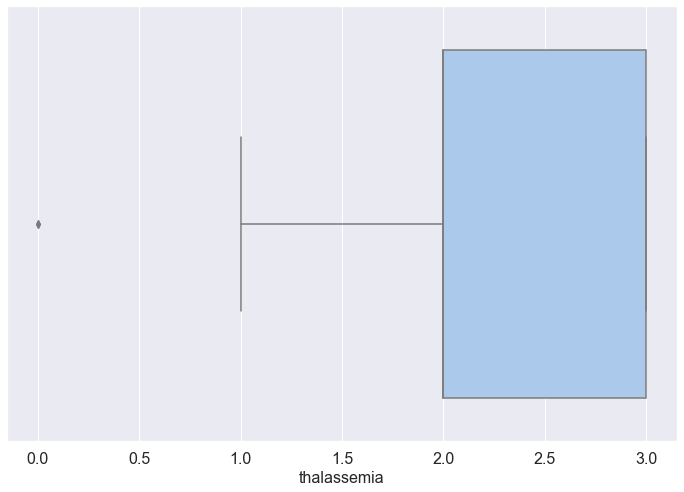

In [17]:
sns.set(palette = 'pastel', rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 16, "ytick.labelsize" : 16 })

thaliava = sns.boxplot(df['thalassemia'])
plt.show()

#### Plotting the Distributions and Relationships Between Specific Features

**age, sex, and target columns to see how the data within each is distributed**

Text(0.5, 0, 'Age')

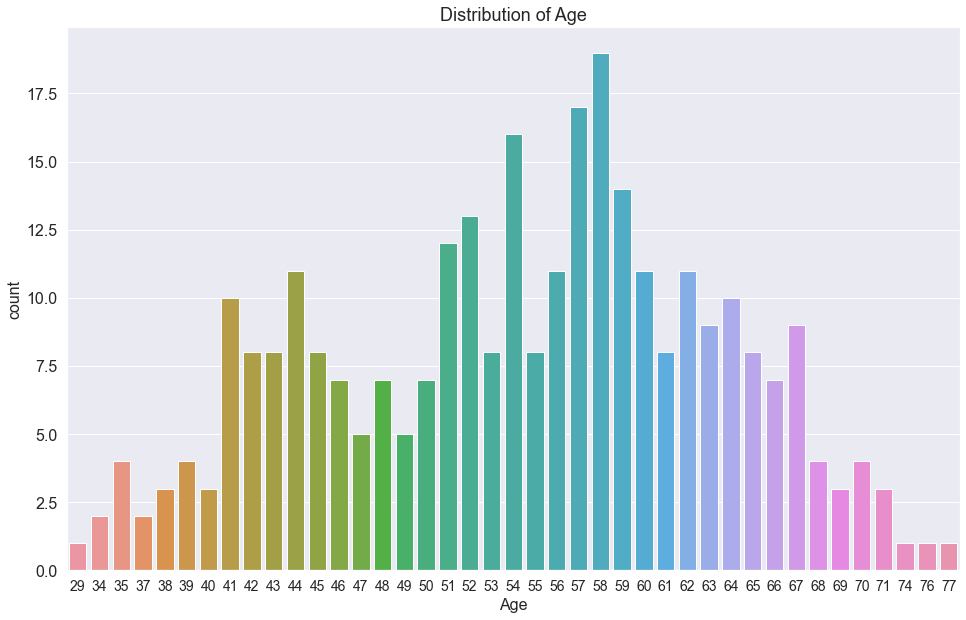

In [18]:
sns.set(palette = 'pastel', rc = {"figure.figsize": (16,10), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 16 })
g = sns.countplot(x = 'age', data = df)
g.set_title('Distribution of Age')
plt.xlabel('Age')

**We can see that the youngest patient was 29 years old, while the oldest was 77. The majority of the patients in this experiment were in their 50s and early 60s, with the most common age being 58 years old.**

print the total number of patients who have been diagnosed with heart disease and those who haven't:

In [19]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [20]:
#dataset is almost balanced; the number of instances in each of the two classes is similar.

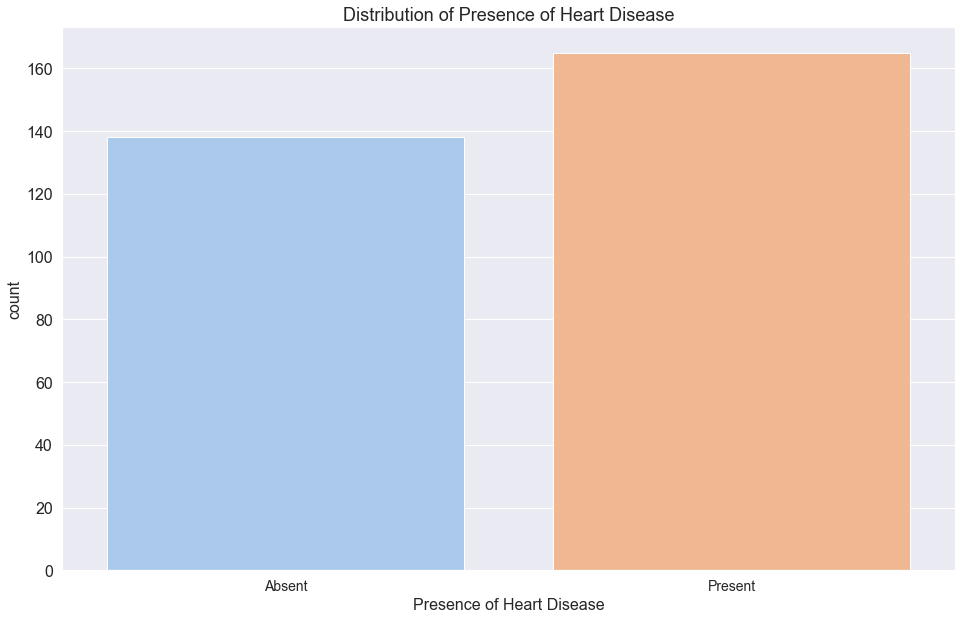

In [21]:
a = sns.countplot(x = 'target', data = df)
a.set_title('Distribution of Presence of Heart Disease')
a.set_xticklabels(['Absent', 'Present'])
plt.xlabel("Presence of Heart Disease")
plt.show()

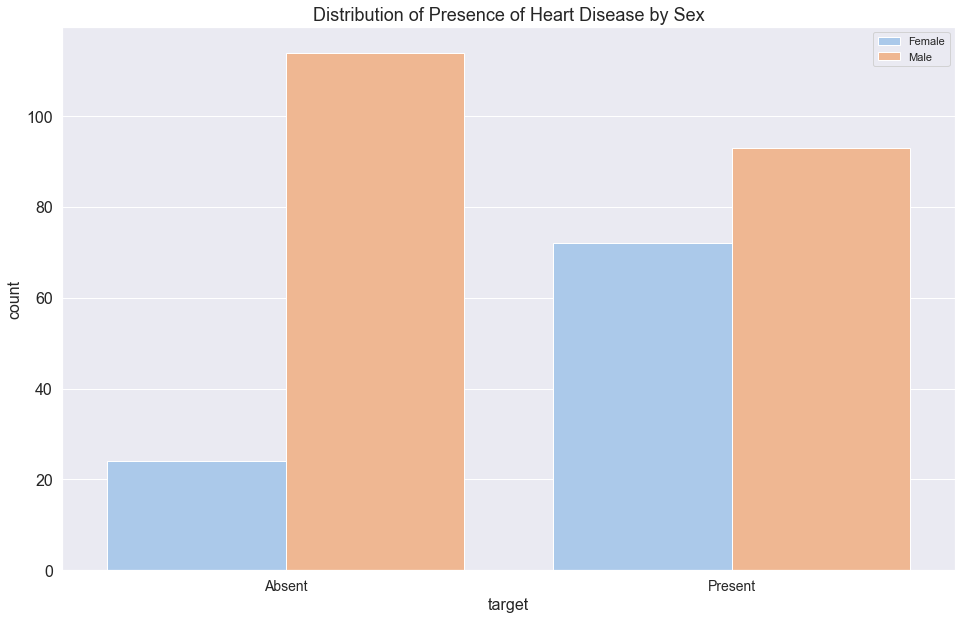

In [22]:
# now for checking which sex has higher cancer cases female or male?
b = sns.countplot(x = 'target', data = df, hue = 'sex')
plt.legend(['Female', 'Male'])
b.set_title('Distribution of Presence of Heart Disease by Sex')
b.set_xticklabels(['Absent', 'Present'])
plt.show()

In [23]:
# now doing simialr with 3 different features

# chest_pain
# nr of colored vessels
# slope of st segment



In [24]:
# chest pain

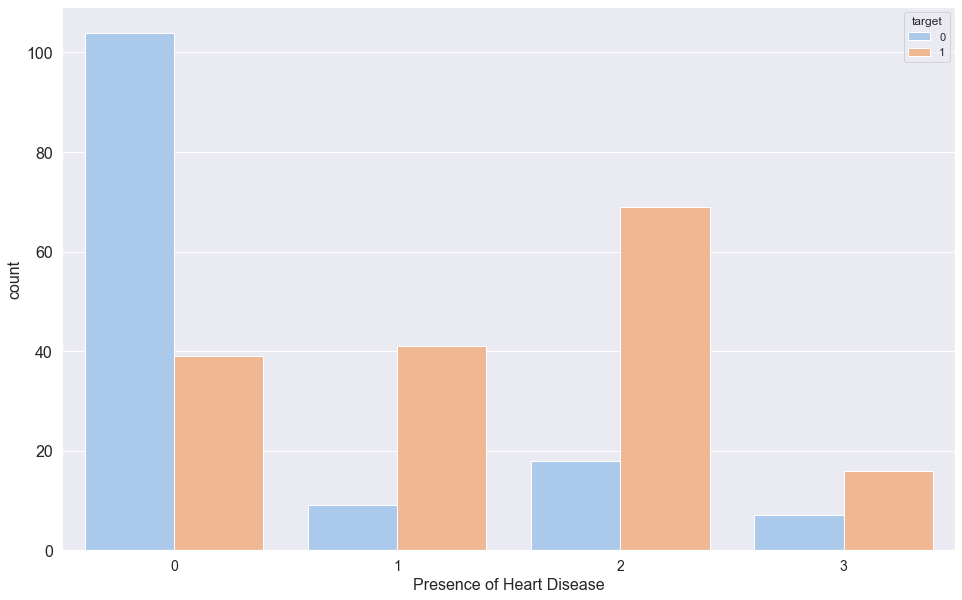

In [25]:
c = sns.countplot(x = 'chest_pain', data = df, hue='target')
a.set_title('Distribution of Presence of Heart Disease by Chest Pain Type')
a.set_xticklabels(['Absent', 'Present'])
plt.xlabel("Presence of Heart Disease")
plt.show()

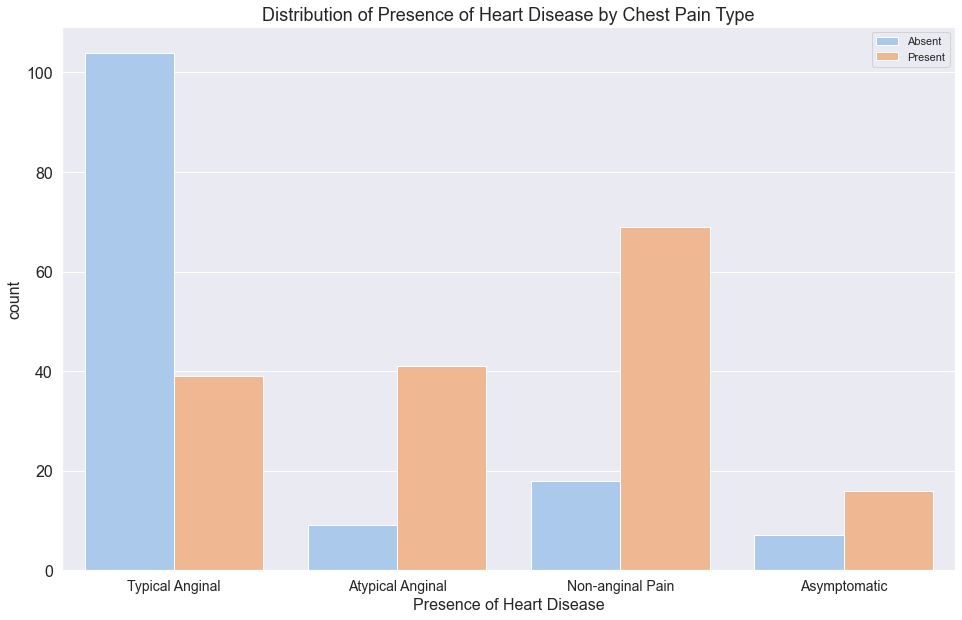

In [27]:
c = sns.countplot(x = 'chest_pain', data = df, hue='target')
plt.legend(['Absent','Present'])
c.set_title('Distribution of Presence of Heart Disease by Chest Pain Type')
c.set_xticklabels(['Typical Anginal', 'Atypical Anginal', 'Non-anginal Pain','Asymptomatic'])
plt.xlabel("Presence of Heart Disease")
plt.show()



**This graph shows that most of the patients have typical angina. The next most common chest pain type is non-anginal pain, then atypical angina, and lastly, asymptomatic. 
Many patients who had typical angina were not diagnosed with heart disease. The largest group of patients with a particular chest pain that had been diagnosed with heart disease had non-anginal pain.**

In [28]:
# now for colored vessels


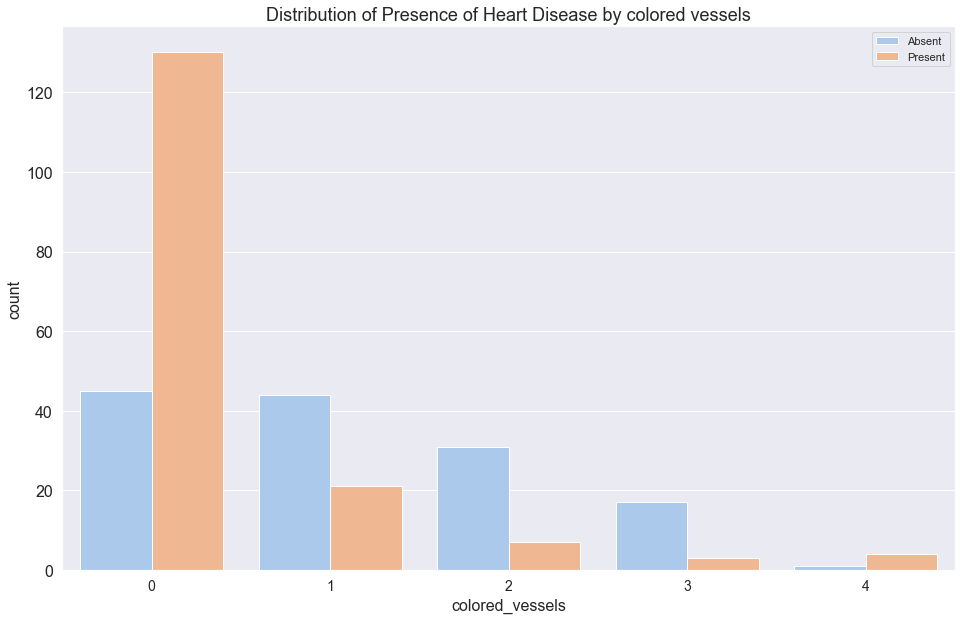

In [29]:
d = sns.countplot(x = 'colored_vessels', data = df, hue='target')
plt.legend(['Absent','Present'])
d.set_title('Distribution of Presence of Heart Disease by colored vessels')

plt.show()





**The preceding graph shows that most of the patients have 0 colored vessels and that most of the patients with 0 colored vessels have been diagnosed with heart disease. This implies a strong negative correlation between colored vessels and heart disease.**

In [30]:
# now with slope

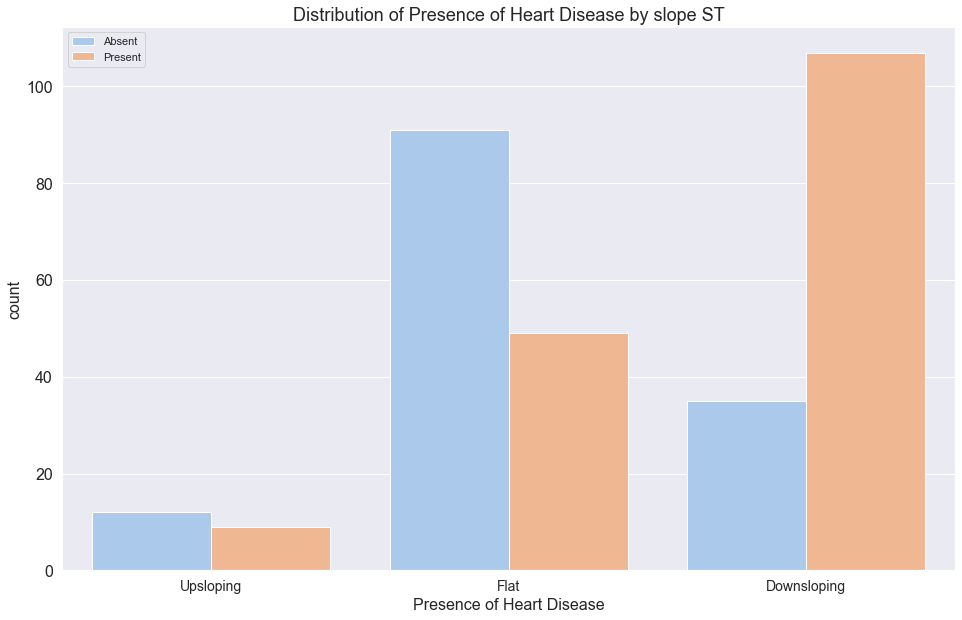

In [32]:
e = sns.countplot(x = 'slope', data = df, hue='target')
plt.legend(['Absent','Present'])
e.set_title('Distribution of Presence of Heart Disease by slope ST')
e.set_xticklabels(['Upsloping', 'Flat', 'Downsloping'])
plt.xlabel("Presence of Heart Disease")
plt.show()

### create a scatter plot to observe the effect maximum recorded heart rate and age have on the diagnosis of heart disease.

In [33]:
sns.set(style = 'whitegrid', palette = 'colorblind', 
rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, "xtick.labelsize" : 16, "ytick.labelsize" : 16 
})

Text(0, 0.5, 'Maximum Heart Rate')

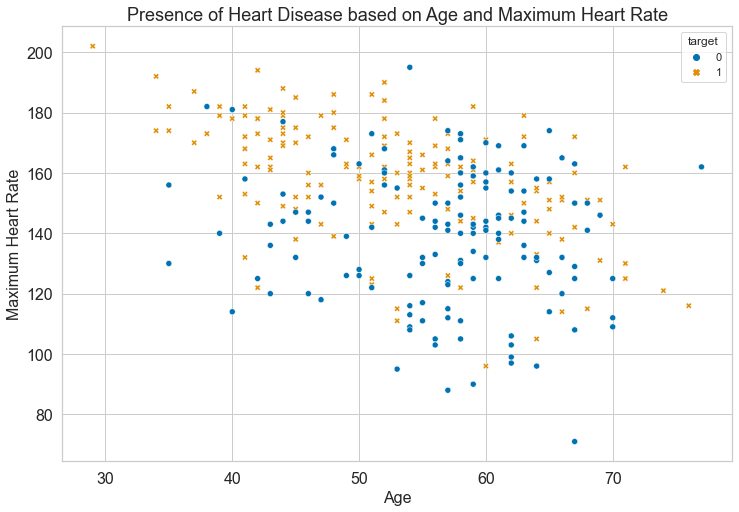

In [34]:
f = sns.scatterplot(x = 'age', y = 'max_hr', hue = 'target', style = 'target', data = df)
f.set_title('Presence of Heart Disease based on Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

In [35]:
# relationship between age and target = 1

Text(0, 0.5, 'Count')

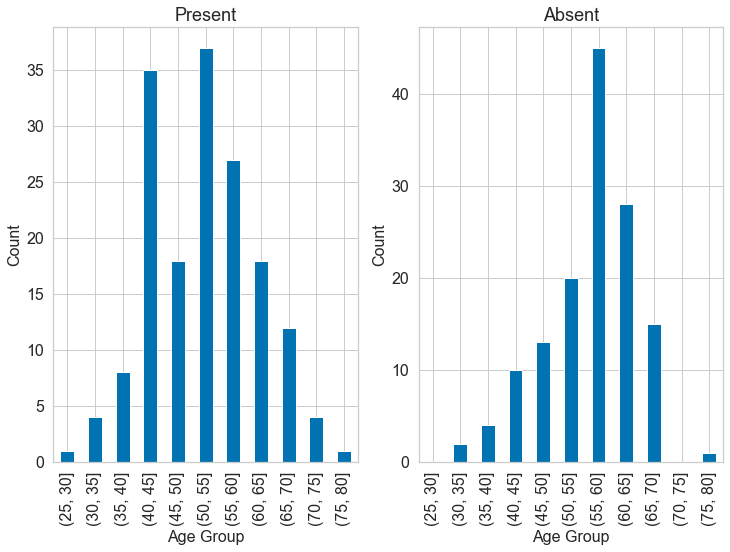

In [36]:
df['age_category'] = pd.cut(df.age, bins = list(np.arange(25, 85, 5))) # 25 bcoz minimum age is 29 and 85 bcuz max age is 77 
# and 5 bcuz number of bins to divide is 5.
plt.subplot(121)
df[df.target == 1].groupby('age_category')['age'].count().plot(kind = 'bar')
plt.title('Present')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.subplot(122)
df[df.target == 0].groupby('age_category')['age'].count().plot(kind = 'bar')
plt.title('Absent')
plt.xlabel('Age Group')
plt.ylabel('Count')


In [37]:
# Relationship between the Presence of Heart Disease and the Cholesterol Column

Text(0, 0.5, 'Maximum Heart Rate')

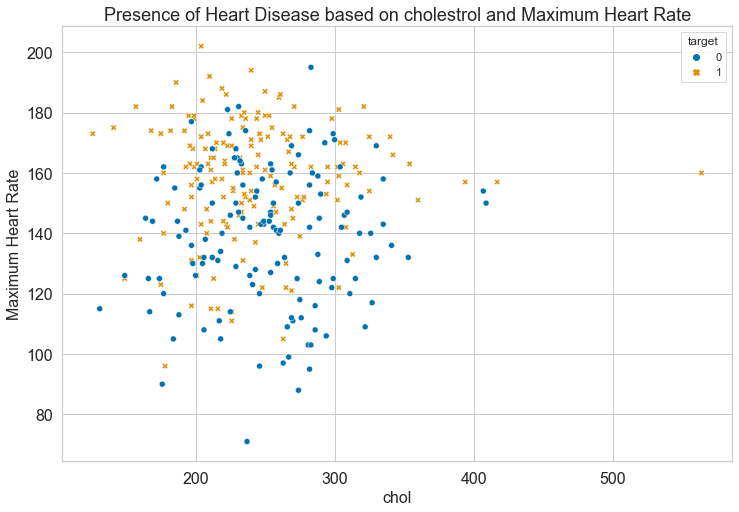

In [38]:
f = sns.scatterplot(x = 'chol', y = 'max_hr', hue = 'target', style = 'target', data = df)
f.set_title('Presence of Heart Disease based on cholestrol and Maximum Heart Rate')
plt.xlabel('chol')
plt.ylabel('Maximum Heart Rate')

Text(0, 0.5, 'Count')

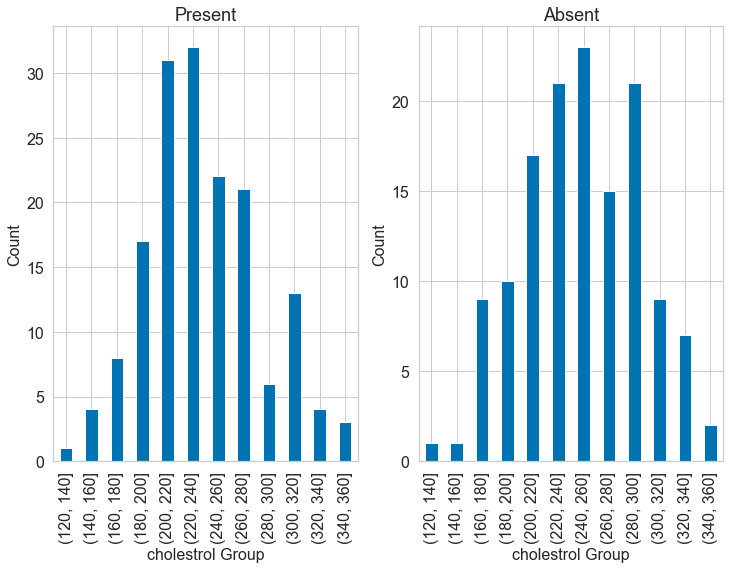

In [40]:
df['chol_category'] = pd.cut(df.chol, bins = list(np.arange(120, 380, 20)))
plt.subplot(121)
df[df.target == 1].groupby('chol_category')['chol'].count().plot(kind = 'bar')
plt.title('Present')
plt.xlabel('cholestrol Group')
plt.ylabel('Count')
plt.subplot(122)
df[df.target == 0].groupby('chol_category')['chol'].count().plot(kind = 'bar')
plt.title('Absent')
plt.xlabel('cholestrol Group')
plt.ylabel('Count')

### Observing the correlations between different features using heatmap

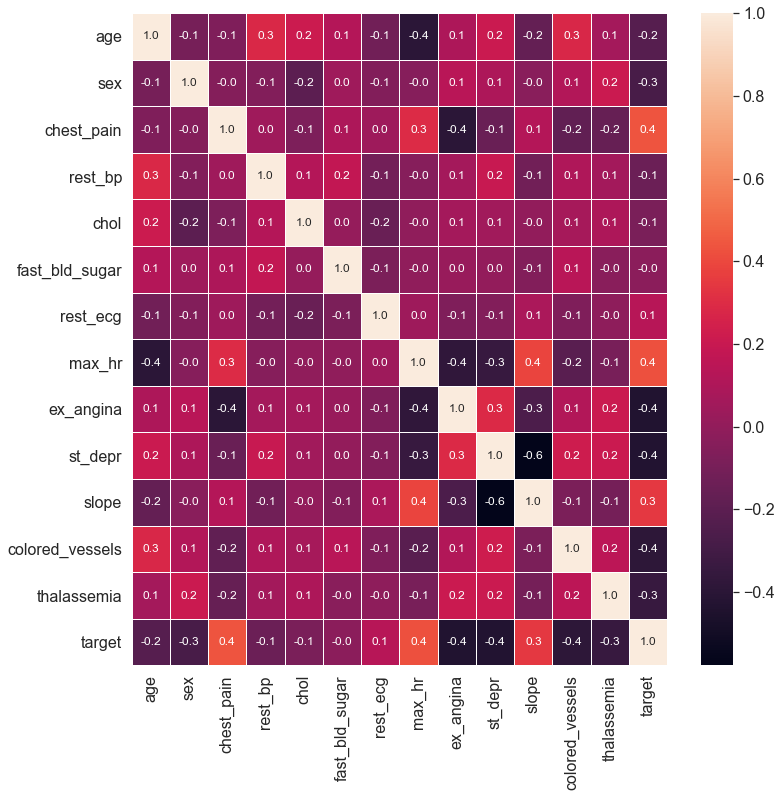

In [42]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt =  '.1f', ax = ax)
plt.show()

**slope, maximum heart rate, and chest pain) have a noticeable positive correlation with the target column**